In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datasets import StaliroDataset
import json
import glob
import os

In [2]:
data_path = '/home/koh/work/matiec_rampo/examples/tankcontrol_flowrate/data'

data_list = glob.glob(os.path.join(data_path, '*.json'))

In [3]:

feature_vec_train = []
feature_vec_test = []
for i, file in enumerate(data_list):
    if i < 200:
        with open(os.path.join(data_path, file), 'r') as f:
            data = json.load(f)
            for d in data:
                d_ = np.concatenate((np.array([d['init_cond']]), np.array(d['samples']), np.array([d['robustness']])))
                feature_vec_train.append(d_)
    elif i < 240:
        with open(os.path.join(data_path, file), 'r') as f:
            data = json.load(f)
            for d in data:
                d_ = np.concatenate((np.array([d['init_cond']]), np.array(d['samples']), np.array([d['robustness']])))
                feature_vec_test.append(d_)
    else:
        break

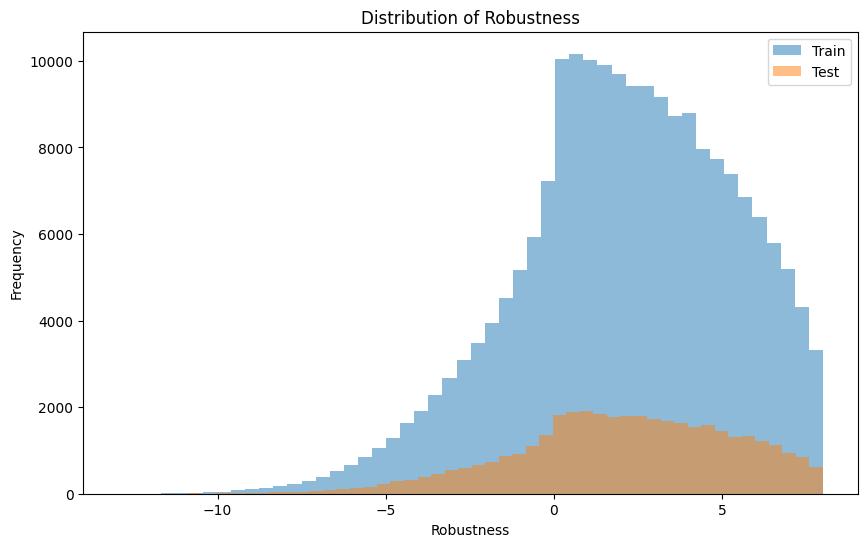

In [4]:
# Extract robustness values from feature_vec_train and feature_vec_test
robustness_train = [vec[-1] for vec in feature_vec_train]
robustness_test = [vec[-1] for vec in feature_vec_test]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(robustness_train, bins=50, alpha=0.5, label='Train')
plt.hist(robustness_test, bins=50, alpha=0.5, label='Test')
plt.xlabel('Robustness')
plt.ylabel('Frequency')
plt.title('Distribution of Robustness')
plt.legend(loc='upper right')
plt.show()

In [36]:
feature_vec_train

array([[ 7.25115661e+00,  5.06009895e-01,  2.51856618e-01, ...,
         1.91850246e+01,  2.81509579e+01, -1.52306747e+00],
       [ 6.44549537e+00,  1.96100506e-02,  7.39712861e-01, ...,
         4.34120147e+01,  2.70061094e+01, -4.56696510e-01],
       [ 7.74153017e+00,  8.15490030e-01,  5.96889211e-01, ...,
         3.00830415e+01,  2.62856963e+01,  2.58470058e-01],
       ...,
       [ 7.39567383e+00,  5.62955811e-01,  8.26738192e-01, ...,
         1.04938509e+01,  3.71158311e+01,  6.84795380e-02],
       [ 3.31935784e+00,  7.27216632e-01,  2.36304986e-01, ...,
         6.39163934e+00,  2.94330077e+01,  4.57302380e+00],
       [ 1.33697727e-01,  7.91413582e-01,  9.41145219e-01, ...,
         3.80170240e+01,  4.56922220e+01,  2.53587627e+00]])

In [58]:
X_train = feature_vec_train[:, :-1]  # 特徴量
y_train = feature_vec_train[:, -1]  # ラベル
negative_y = feature_vec_train[feature_vec_train[:,-1] < 0]
X_negative = negative_y[:, :-1]  # 特徴量
y_negative = negative_y[:, -1]  # ラベル

In [52]:
negative_y.shape

(46848, 18)

In [59]:
# 追加したいサンプル数を設定（例: 元の負のサンプル数の50%を追加）
additional_samples = int(0.5 * X_negative.shape[0])

# ランダムにサンプルを複製（リプレースメントあり）
indices = np.random.choice(X_negative.shape[0], size=additional_samples, replace=True)
X_oversampled = X_negative[indices]
y_oversampled = y_negative[indices]

# 特徴量にノイズを追加（ノイズレベルを調整可能）
noise_level = 0.01  # ノイズの強さ
X_oversampled += noise_level * np.random.randn(*X_oversampled.shape)

# ターゲット変数にも少量のノイズを追加
y_oversampled += noise_level * np.random.randn(*y_oversampled.shape)

In [66]:
y_oversampled

array([-1.89484433, -3.2647304 , -4.14757391, ..., -1.17528496,
       -2.91809704,  0.00564663])

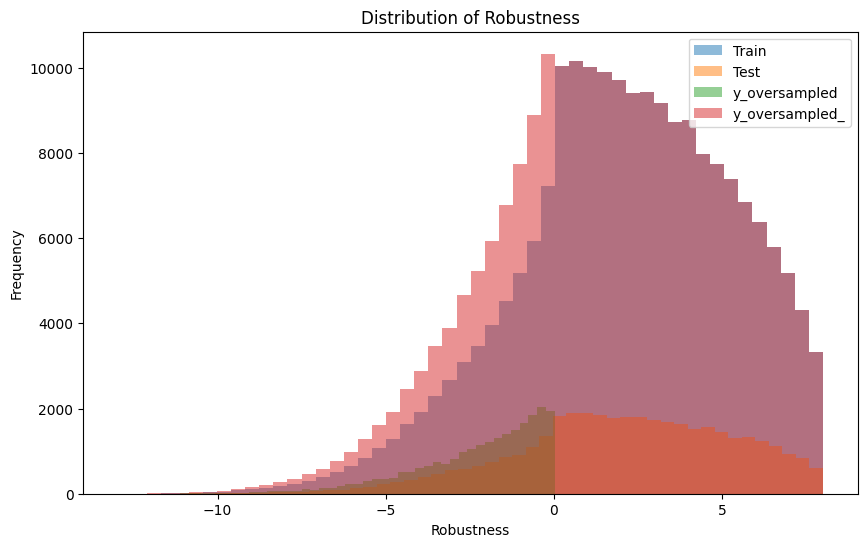

In [68]:
# Extract robustness values from feature_vec_train and feature_vec_test
robustness_train = [vec[-1] for vec in feature_vec_train]
robustness_test = [vec[-1] for vec in feature_vec_test]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(robustness_train, bins=50, alpha=0.5, label='Train')
plt.hist(robustness_test, bins=50, alpha=0.5, label='Test')
plt.hist(y_oversampled, bins=50, alpha=0.5, label='y_oversampled')
plt.hist(robustness_train+y_oversampled.tolist(), bins=50, alpha=0.5, label='y_oversampled_')
plt.xlabel('Robustness')
plt.ylabel('Frequency')
plt.title('Distribution of Robustness')
plt.legend(loc='upper right')
plt.show()